In [1]:
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
from spec_id import Analyze_LH_lwa, Error,Oldest_galaxy, Gen_spec, Stack,Median_model, \
    Median_w_Error,Median_w_Error_cont,Likelihood_contours,Gen_sim, Stack_posteriors, Linear_fit , \
    Median_w_Error_95,Gen_grid
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)
pandas2ri.activate()

In [2]:
def Gen_grid(DB,param):
    grid=[]
    for i in DB.index:
        x,Px = np.load('../chidat/%s_dtau_%s_pos_lwa_3.npy' % (DB['gids'][i],param))
        grid.append(Px)
    return np.array(grid)

def Gen_grid_dust(DB,param):
    grid=[]
    for i in DB.index:
        x,Px = np.load('../chidat/%s_dtau_%s_pos_lwa_dust.npy' % (DB['gids'][i],param))
        grid.append(Px)
    return np.array(grid)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [34]:
"""DATA"""
lzDB = galDB.query('hi_res_specz < 1.16')

PZl_grid = Gen_grid(lzDB,'Z')
PTl_grid = Gen_grid(lzDB,'t')
PZl = Stack_posteriors(PZl_grid,metal)
PTl = Stack_posteriors(PTl_grid,age)

Zmedl, Zler, Zher = Median_w_Error_95(PZl, metal)
tmedl, tler, ther = Median_w_Error_95(PTl, age)


Mstack = Stack(lzDB['gids'].values,lzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3950,5200,1))
Mstack.Stack_normwmean()
Mstack.Stack_normwmean_model(Zmedl,tmedl,tau,bftau=8.0)

Zlstack = Stack(lzDB['gids'].values,lzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3950,5200,1))
Zlstack.Stack_normwmean()
Zlstack.Stack_normwmean_model(0.003,tmedl,tau,bftau=8.0)

Zhstack = Stack(lzDB['gids'].values,lzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3950,5200,1))
Zhstack.Stack_normwmean()
Zhstack.Stack_normwmean_model(0.029,tmedl,tau,bftau=8.0)

tlstack = Stack(lzDB['gids'].values,lzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3950,5200,1))
tlstack.Stack_normwmean()
tlstack.Stack_normwmean_model(Zmedl,1.4,tau,bftau=8.0)

thstack = Stack(lzDB['gids'].values,lzDB['hi_res_specz'].values,np.arange(3400,5300,10),np.arange(3950,5200,1))
thstack.Stack_normwmean()
thstack.Stack_normwmean_model(Zmedl,5.4,tau,bftau=8.0)

../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../data/galaxy_flts/n16758_flt.detect.cat
../data/galaxy_flts/n19442_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n19442_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n19442_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n19442_flt: save ../data/galaxy_flts/n19442_flt.detect_seg.fits, ../dat

In [35]:
"""PLOT"""

def Plot_stack(wv, fl, er, mwv1, mfl1, mwv2, mfl2, mwv3, mfl3
               ,bfm,bfa,param,window=[],save_plot=False,plot_name=''):
    
    gs = gridspec.GridSpec(2,2,hspace=0,wspace=0,width_ratios=[3,1])
    
    plt.figure(figsize=[15,7])
    plt.subplot(gs[0:,0])
    plt.errorbar(wv,fl * 1000,er * 1000,color='#404040',fmt='o',ms = 4,elinewidth=2)
    plt.plot(mwv1,mfl1 * 1000,color='#ca0020',
             label='Z=%s Z$_\odot$,t=%s Gyrs' % (np.round(bfm/0.019,2),bfa),zorder = 5,linewidth = 2)
    plt.plot(mwv2,mfl2 * 1000,color='#f4a582',zorder = 5,linewidth = 2,
            label='2 $\sigma$ low %s' % param )
    plt.plot(mwv3,mfl3 * 1000,color='k',zorder = 5,linewidth = 2,
            label='2 $\sigma$ high %s' % param)
    
    plt.axvline(3934.777,linestyle='--', alpha=.3)
    plt.axvline(3969.588,linestyle='--', alpha=.3)
    plt.axvline(4102.89,linestyle='--', alpha=.3)
    plt.axvline(4305.61,linestyle='--', alpha=.3)
    plt.axvline(4341.68,linestyle='--', alpha=.3)
    plt.axvline(4862.68,linestyle='--', alpha=.3)
    plt.axvline(5176.7,linestyle='--', alpha=.3)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(5120, 5240, color='k', alpha=.1)
    plt.text(3900,window[3]+.05,'Ca HK',fontsize=15)
    plt.text(4080,window[3]+.05,'H$\delta$',fontsize=15)
    plt.text(4280,window[3]+.05,'G+H$\gamma$',fontsize=15)
    plt.text(4830,window[3]+.05,'H$\\beta$',fontsize=15)
    plt.text(5160,window[3]+.05,'Mgb',fontsize=15)
    plt.ylim(0,window[2])
    
    plt.ylabel('F$_\lambda$',size=20)
    plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=20)
    plt.minorticks_on()
    
    if save_plot == True:
        plt.savefig(plot_name,bbox_inches = 'tight')
    else:
        plt.show()
    plt.close()

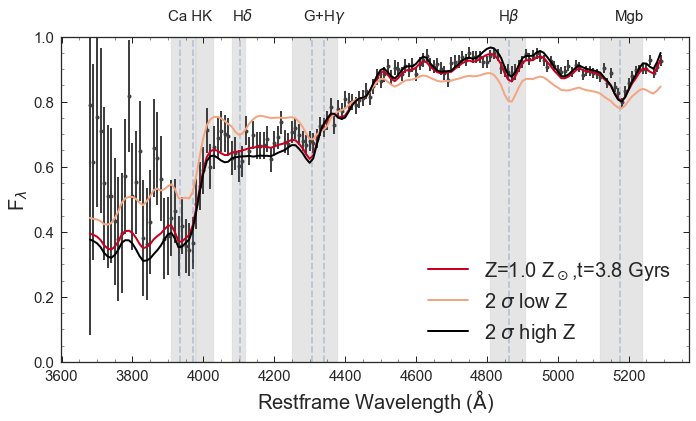

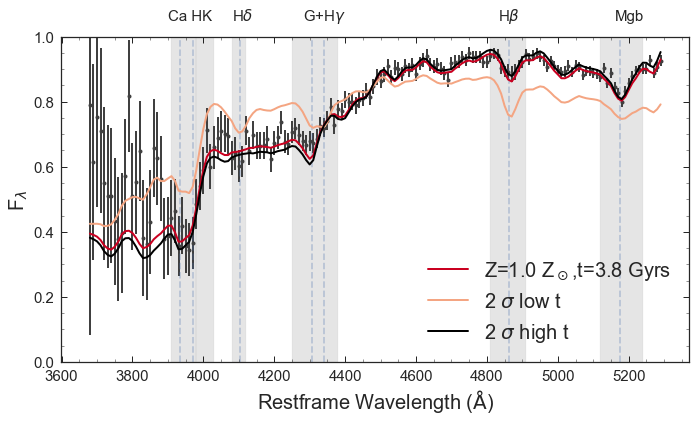

In [36]:
%matplotlib inline

Plot_stack(Mstack.wv, Mstack.fl, Mstack.er, Mstack.mwv, Mstack.mfl, 
           Zlstack.mwv, Zlstack.mfl, Zhstack.mwv, Zhstack.mfl,
           0.019,3.8,'Z',window=[3800,5300,1.0,1.0],save_plot=False,
           plot_name='../plots/stack_Z_95_2-15.png')

Plot_stack(Mstack.wv, Mstack.fl, Mstack.er, Mstack.mwv, Mstack.mfl, 
           tlstack.mwv, tlstack.mfl, thstack.mwv, thstack.mfl,
           0.019,3.8,'t',window=[3800,5300,1.0,1.0],save_plot=False,
           plot_name='../plots/stack_t_95_2-15.png')

In [30]:
m_pos=np.zeros([len(lzDB['gids'].values),age.size])
a_pos=np.zeros([len(lzDB['gids'].values),metal.size])

for i in range(len(lzDB.index)):
    P = np.load('../chidat/%s_dtau_tZ_pos_lwa_3.npy' % lzDB['gids'][lzDB.index[i]])
    m_pos[i] = P.T[17]/np.trapz(P.T[17],age)
    a_pos[i] = P[33]/np.trapz(P[33],metal)


In [22]:
P.T[0].shape

(56,)

In [33]:
mspos = Stack_posteriors(m_pos,age)
aspos = Stack_posteriors(a_pos,metal)
print Median_w_Error_95(mspos,age)
print Median_w_Error_95(aspos,metal)

(3.1000000000000001, 1.696, 2.2610000000000001)
(0.016, 0.012999999999999999, 0.012999999999999999)


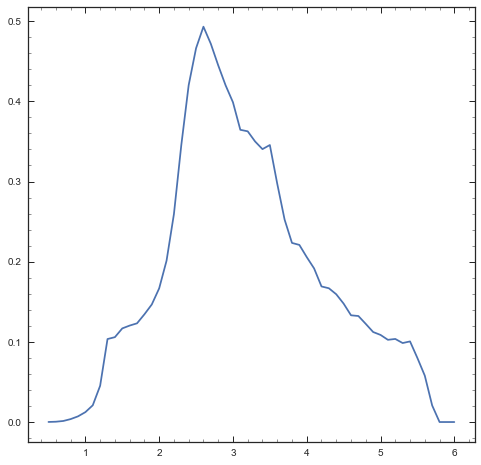

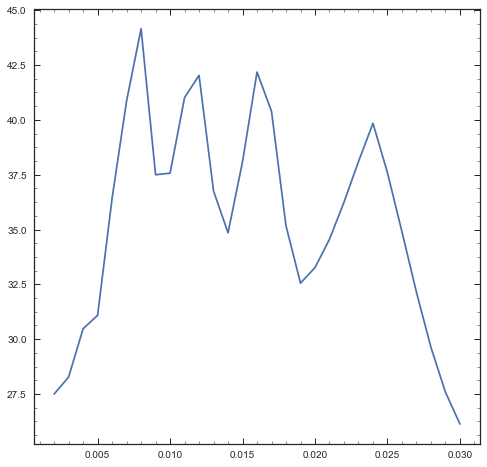

In [32]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(age,mspos)

plt.figure(figsize=[8,8])
plt.plot(metal,aspos)